In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READING DATA

In [65]:
data=pd.read_csv('sc_data.csv')

In [66]:
data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [67]:
data.shape

(55932, 11)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [69]:
data.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


In [70]:
data['Topic'].value_counts()

economy      20486
obama        16917
microsoft    12911
palestine     5618
Name: Topic, dtype: int64

# DATA PREPROESSING

Missing Value 

In [71]:
data.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

In [72]:
data['Source'].fillna(data['Source'].mode()[0],inplace=True)

In [73]:
data.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
Facebook             0
GooglePlus           0
LinkedIn             0
SentimentTitle       0
SentimentHeadline    0
dtype: int64

OUTLIER DETECTION

Text(0.5, 1.0, 'Boxplot of Facebook')

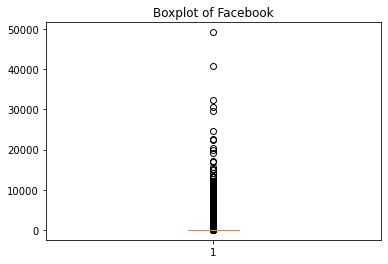

In [74]:
plt.boxplot(data['Facebook'])
plt.title('Boxplot of Facebook')

In [75]:
Q1=np.percentile(data['Facebook'],25,interpolation='midpoint')
Q2=np.percentile(data['Facebook'],50,interpolation='midpoint')
Q3=np.percentile(data['Facebook'],75,interpolation='midpoint')

In [76]:
print(Q1,Q2,Q3)

0.0 6.0 37.0


In [77]:
IQR=Q3-Q1

In [78]:
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [79]:
low_lim,Up_lim

(-55.5, 92.5)

In [80]:
outlier=[]
for x in data['Facebook']:
 if((x>Up_lim) or (x<low_lim)):
    outlier.append(x)
outlier    

[127,
 177,
 129,
 151,
 1431,
 146,
 96,
 98,
 110,
 148,
 263,
 316,
 304,
 169,
 3281,
 135,
 185,
 138,
 133,
 156,
 661,
 95,
 119,
 147,
 133,
 184,
 1439,
 99,
 157,
 167,
 148,
 95,
 295,
 357,
 1026,
 124,
 213,
 213,
 254,
 277,
 297,
 123,
 562,
 134,
 135,
 132,
 95,
 121,
 191,
 213,
 1084,
 119,
 440,
 178,
 2850,
 162,
 125,
 1183,
 165,
 559,
 142,
 388,
 734,
 161,
 163,
 220,
 209,
 2361,
 206,
 143,
 134,
 129,
 127,
 684,
 204,
 230,
 416,
 2156,
 123,
 486,
 2289,
 130,
 110,
 202,
 98,
 148,
 138,
 138,
 286,
 96,
 775,
 96,
 123,
 123,
 580,
 877,
 150,
 218,
 319,
 743,
 3509,
 244,
 99,
 598,
 165,
 359,
 341,
 3526,
 94,
 106,
 317,
 637,
 105,
 115,
 128,
 132,
 96,
 115,
 173,
 2455,
 189,
 450,
 404,
 365,
 131,
 94,
 168,
 736,
 112,
 115,
 99,
 784,
 475,
 460,
 678,
 282,
 94,
 967,
 104,
 475,
 106,
 130,
 126,
 783,
 154,
 379,
 198,
 117,
 468,
 382,
 153,
 172,
 113,
 114,
 204,
 194,
 110,
 449,
 124,
 467,
 123,
 152,
 110,
 576,
 468,
 1079,
 136,

In [81]:
ind1=data['Facebook']>Up_lim
data.loc[ind1].index

Int64Index([  746,   754,   758,   761,   768,   803,   825,   833,   861,
              869,
            ...
            55803, 55811, 55828, 55844, 55865, 55897, 55899, 55922, 55927,
            55929],
           dtype='int64', length=8911)

In [82]:
data.drop(data.loc[ind1].index,inplace=True)

In [83]:
ind2=data['Facebook']<low_lim
data.loc[ind2].index


Int64Index([], dtype='int64')

In [84]:
data.shape

(47021, 11)

Text(0.5, 1.0, 'Boxplot of SentimentTitle')

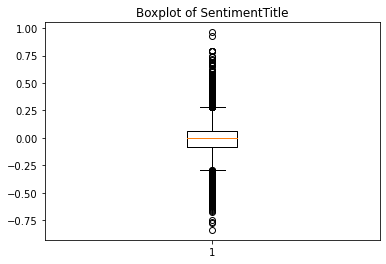

In [85]:
plt.boxplot(data['SentimentTitle'])
plt.title('Boxplot of SentimentTitle')

In [86]:
Q1=np.percentile(data['SentimentTitle'],25,interpolation='midpoint')
Q2=np.percentile(data['SentimentTitle'],50,interpolation='midpoint')
Q3=np.percentile(data['SentimentTitle'],75,interpolation='midpoint')

In [87]:
print(Q1,Q2,Q3)

-0.0790569415042095 0.0 0.0661437827766148


In [88]:
IQR=Q3-Q1

In [89]:
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR
print(low_lim,Up_lim)

-0.29685802792544597 0.2839448691978513


In [90]:
outlier=[]
for x in data['SentimentTitle']:
    if((x>Up_lim) or(x<low_lim)):
     outlier.append(x)
outlier

[-0.425210032135381,
 0.2916666666666669,
 0.2916666666666669,
 0.2916666666666669,
 -0.5625,
 -0.3015113445777639,
 0.4583333333333329,
 -0.412965817545357,
 0.348622492168039,
 -0.313282440597627,
 -0.322353900297541,
 0.333333333333333,
 0.553398590529466,
 0.317560542190184,
 0.320407760225154,
 0.320407760225154,
 0.3501300488909279,
 -0.340797033896654,
 0.3496694065589339,
 0.315972222222222,
 -0.3189075241015349,
 -0.3189075241015349,
 -0.3854166666666671,
 -0.329931487897638,
 -0.344231918647063,
 -0.333333333333333,
 0.714609862168283,
 0.316227766016838,
 0.3878731192550279,
 0.475087368609712,
 -0.375,
 -0.3802540372787029,
 0.284806897977915,
 -0.329001071802074,
 0.395284707521047,
 -0.5625,
 -0.3061862178478969,
 0.341666666666667,
 0.425,
 0.375,
 0.337901287363884,
 0.444888016496536,
 -0.441941738241592,
 -0.309359216769115,
 0.376889180722205,
 0.460644201479996,
 -0.355756236768943,
 0.2916666666666669,
 -0.327893587228318,
 0.34489258162092,
 -0.472455591261534,
 -

In [91]:
ind1=data['SentimentTitle']>Up_lim
data['SentimentTitle'].loc[ind1].index

Int64Index([   22,    23,    32,   182,   224,   328,   330,   338,   389,
              403,
            ...
            55614, 55698, 55780, 55834, 55835, 55907, 55908, 55909, 55915,
            55918],
           dtype='int64', length=1083)

In [92]:
data.drop(data['SentimentTitle'].loc[ind1].index,inplace=True)

In [93]:
data.shape

(45938, 11)

In [94]:
ind2=data['SentimentTitle']<low_lim
data['SentimentTitle'].loc[ind2].index

Int64Index([    2,    53,   168,   183,   240,   320,   410,   467,   470,
              478,
            ...
            55446, 55550, 55586, 55712, 55736, 55807, 55842, 55843, 55874,
            55885],
           dtype='int64', length=1183)

In [95]:
data.drop(data['SentimentTitle'].loc[ind2].index,inplace=True)

In [96]:
data.shape

(44755, 11)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c041722b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23c041729d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c04162ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x23c0417f130>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c0417f4c0>],
 'means': []}

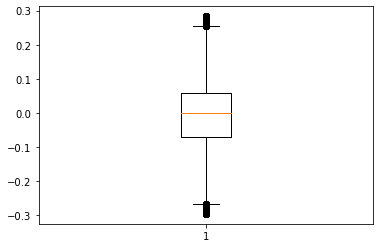

In [97]:
plt.boxplot(data['SentimentTitle'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23c052af340>,
 'caps': [<matplotlib.lines.Line2D at 0x23c052afa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c0529df70>],
 'medians': [<matplotlib.lines.Line2D at 0x23c052b81c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c052b8550>],
 'means': []}

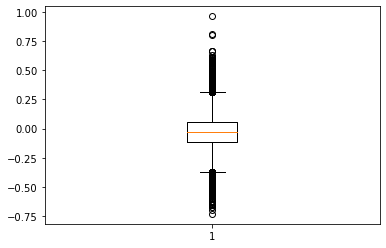

In [98]:
plt.boxplot(data['SentimentHeadline'])

In [99]:
Q1=np.percentile(data['SentimentTitle'],25,interpolation='midpoint')
Q2=np.percentile(data['SentimentTitle'],50,interpolation='midpoint')
Q3=np.percentile(data['SentimentTitle'],75,interpolation='midpoint')

In [100]:
print(Q1,Q2,Q3)

-0.0721687836487032 0.0 0.05867481901065605


In [101]:
IQR=Q3-Q1

In [102]:
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [103]:
print(low_lim,)

-0.26843418763774207


In [104]:
outlier=[]
for x in data['SentimentHeadline']:
    if((x>Up_lim) or(x<low_lim)):
     outlier.append(x)
outlier

[-0.375259329232792,
 0.3267179814093779,
 -0.5573309174897559,
 -0.561601714945583,
 -0.328394168833779,
 -0.4054385386884749,
 -0.355275754535662,
 0.289583333333333,
 0.334564611894569,
 -0.26879443250423,
 -0.272294236949103,
 -0.293706195187807,
 -0.329001071802074,
 0.4461642074393689,
 -0.283806604938252,
 -0.280422079063356,
 -0.369214782230419,
 -0.357911946627186,
 -0.292925049706854,
 -0.338692350470446,
 -0.3107332924432009,
 -0.304271137604623,
 -0.2693879391859369,
 -0.2693879391859369,
 -0.457493203846414,
 -0.303646125988108,
 -0.358696297931962,
 -0.317658677665075,
 0.280583333333333,
 -0.296643121685503,
 -0.287376798921,
 -0.461934885437156,
 -0.421006049540859,
 0.2953574293770999,
 -0.270787047213786,
 0.3231580174310819,
 0.3231580174310819,
 -0.300346674840396,
 0.312979232851573,
 -0.310438804206896,
 -0.401477534273483,
 0.4698713017514599,
 -0.2791528645300539,
 -0.2791528645300539,
 -0.2791528645300539,
 0.263255160909815,
 0.284745945262828,
 0.256116463436

In [105]:
ind1=data['SentimentTitle']>Up_lim
data['SentimentTitle'].loc[ind1].index

Int64Index([  130,   175,   399,   433,   486,   762,   847,   850,   970,
             1068,
            ...
            53033, 53557, 53607, 53906, 54595, 55088, 55199, 55462, 55547,
            55817],
           dtype='int64', length=428)

In [106]:
data.drop(data['SentimentHeadline'].loc[ind1].index,inplace=True)

In [107]:
data.shape

(44327, 11)

In [108]:
ind2=data['SentimentHeadline']<low_lim
data['SentimentTitle'].loc[ind2].index

Int64Index([   12,    75,    78,    90,   119,   141,   187,   253,   286,
              288,
            ...
            55665, 55682, 55697, 55738, 55764, 55776, 55787, 55851, 55889,
            55906],
           dtype='int64', length=2105)

ENCODING

In [109]:
data_dum=pd.get_dummies(data['Topic'])

In [110]:
data_dum.head()

,economy,microsoft,obama,palestine
0,0,0,1,0
1,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,0,1,0,0


In [111]:
data.drop('Topic',axis=1)
data=pd.concat([data, data_dum], axis=1)


In [112]:
data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,economy,microsoft,obama,palestine
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,0,0,1,0
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,1,0,0,0
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064,1,0,0,0
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084,1,0,0,0
5,1P7kLrnWEp,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-1,-1,-1,-0.075378,0.036773,0,1,0,0


In [113]:
data.dtypes

IDLink                object
Title                 object
Headline              object
Source                object
Topic                 object
PublishDate           object
Facebook               int64
GooglePlus             int64
LinkedIn               int64
SentimentTitle       float64
SentimentHeadline    float64
economy                uint8
microsoft              uint8
obama                  uint8
palestine              uint8
dtype: object

array([[<AxesSubplot:title={'center':'SentimentTitle'}>,
        <AxesSubplot:title={'center':'SentimentHeadline'}>]], dtype=object)

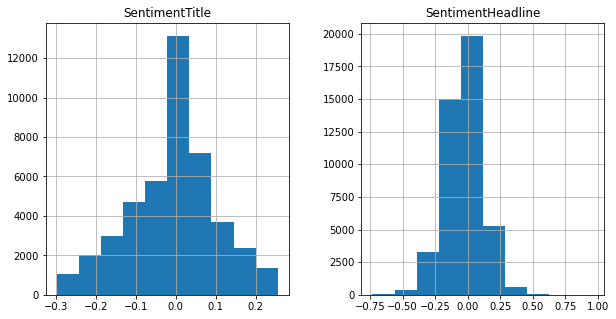

In [114]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))

array([[<AxesSubplot:title={'center':'Facebook'}>,
        <AxesSubplot:title={'center':'GooglePlus'}>],
       [<AxesSubplot:title={'center':'LinkedIn'}>, <AxesSubplot:>]],
      dtype=object)

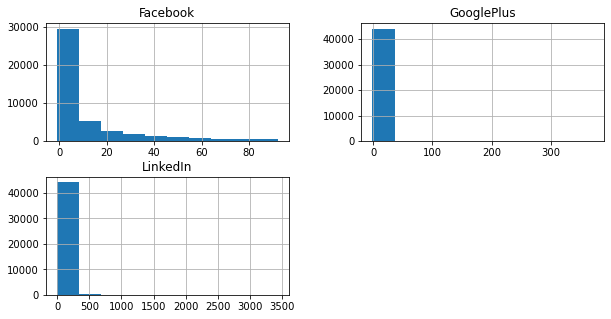

In [115]:
freqgraph=data[['Facebook','GooglePlus','LinkedIn']]
freqgraph.hist(figsize=(10,5))

array([[<AxesSubplot:title={'center':'economy'}>,
        <AxesSubplot:title={'center':'obama'}>],
       [<AxesSubplot:title={'center':'palestine'}>,
        <AxesSubplot:title={'center':'microsoft'}>]], dtype=object)

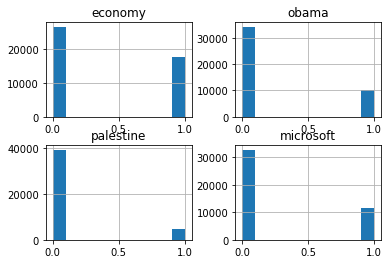

In [116]:
freqgraph=data[['economy','obama','palestine','microsoft']]
freqgraph.hist()

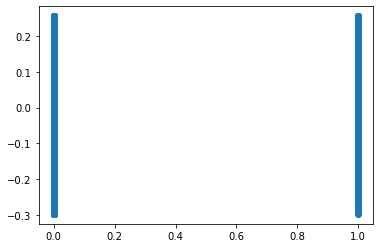

In [117]:
x=data['microsoft']
y=data['SentimentTitle']
plt.scatter(x,y)
plt.xlabel
plt.show()

In [123]:
data.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'Facebook', 'GooglePlus', 'LinkedIn', 'SentimentTitle',
       'SentimentHeadline', 'economy', 'microsoft', 'obama', 'palestine'],
      dtype='object')

# REGRESSION

In [136]:
x=data[['Facebook','LinkedIn','GooglePlus']]
y=data['SentimentTitle']

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [138]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [139]:
model = lr.fit(X_train,y_train)

In [140]:
prediction=model.predict(X_test)

In [141]:
prediction

array([-0.00707401, -0.00684717, -0.00760883, ..., -0.00690576,
       -0.00690576, -0.00842157])

In [142]:
from sklearn.metrics import mean_squared_error
print('MSE is:\n ',mean_squared_error(y_test,prediction))

MSE is:
  0.01168863836541112
